In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier


In [69]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [70]:
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier

In [71]:
from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support as score

In [72]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

In [73]:
import pandas as pd
pd.set_option("display.max_columns",45)
df = pd.read_csv("ready_for_model.csv",index_col=0)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85983 entries, 0 to 119389
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   market_segment_Aviation         85983 non-null  int64  
 1   market_segment_Complementary    85983 non-null  int64  
 2   market_segment_Corporate        85983 non-null  int64  
 3   market_segment_Direct           85983 non-null  int64  
 4   market_segment_Groups           85983 non-null  int64  
 5   market_segment_Offline TA/TO    85983 non-null  int64  
 6   market_segment_Online TA        85983 non-null  int64  
 7   market_segment_Undefined        85983 non-null  int64  
 8   distribution_channel_Corporate  85983 non-null  int64  
 9   distribution_channel_GDS        85983 non-null  int64  
 10  distribution_channel_TA/TO      85983 non-null  int64  
 11  distribution_channel_Undefined  85983 non-null  int64  
 12  deposit_type_Non Refund        

In [74]:
df= df.drop_duplicates()

In [76]:
df.head()

,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,...,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_true_room
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,342,2015,27,1,0,0,2,0,0,136,0,0,0,2,0.0,0.0,0,0.0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,737,2015,27,1,0,0,2,0,0,136,0,0,0,2,0.0,0.0,0,0.0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,7,2015,27,1,0,1,1,0,0,59,0,0,0,0,0.0,0.0,0,75.0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,13,2015,27,1,0,1,1,0,0,59,0,0,0,0,304.0,0.0,0,75.0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,...,0,14,2015,27,1,0,2,2,0,0,59,0,0,0,0,240.0,0.0,0,98.0,0,1,1


In [77]:
obj = list(df.select_dtypes(exclude=["object"]).columns)
for o in obj:
    print(o+": ",df[o].unique(),"\n")

market_segment_Aviation:  [0 1] 

market_segment_Complementary:  [0 1] 

market_segment_Corporate:  [0 1] 

market_segment_Direct:  [1 0] 

market_segment_Groups:  [0 1] 

market_segment_Offline TA/TO:  [0 1] 

market_segment_Online TA:  [0 1] 

market_segment_Undefined:  [0 1] 

distribution_channel_Corporate:  [0 1] 

distribution_channel_GDS:  [0 1] 

distribution_channel_TA/TO:  [0 1] 

distribution_channel_Undefined:  [0 1] 

deposit_type_Non Refund:  [0 1] 

deposit_type_Refundable:  [0 1] 

customer_type_Contract:  [0 1] 

customer_type_Group:  [0 1] 

customer_type_Transient:  [1 0] 

meal_BB:  [1 0] 

meal_FB:  [0 1] 

meal_HB:  [0 1] 

meal_SC:  [0 1] 

meal_Undefined:  [0 1] 

arrival_date_month_April:  [0 1] 

arrival_date_month_August:  [0 1] 

arrival_date_month_December:  [0 1] 

arrival_date_month_February:  [0 1] 

arrival_date_month_January:  [0 1] 

arrival_date_month_July:  [1 0] 

arrival_date_month_June:  [0 1] 

arrival_date_month_March:  [0 1] 

arrival_date_mon

In [78]:
df = df.dropna()

In [79]:
;#df["log_agent"]= np.log(df["agent"]+1)
#df["log_company"]= np.log(df["company"]+1)
#df["log_adr"]= np.log(df["adr"]+1)

#df = df.drop(columns=["agent","company","adr"])
df =df.drop_duplicates()

In [80]:
print('Not canceled: {}%'.format(round((df['is_canceled'].value_counts()[0] / df.shape[0]), 2)*100))
print('Canceled: {}%'.format(round((df['is_canceled'].value_counts()[1] / df.shape[0]), 2)*100))
# Dengeli bir dataseti değil. Sampling yöntemlerine başvuracağız.Tahmin amacımız Canceled tahmin etmek sonuçta.

Not canceled: 73.0%
Canceled: 27.0%


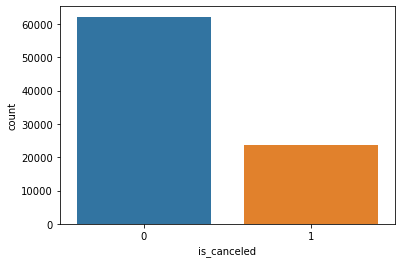

In [ ]:
sns.countplot(df["is_canceled"])
plt.savefig("count.jpeg",dpi=300,bbox_inches="tight")

In [81]:
df.shape

(85983, 57)

In [82]:
df.describe()

,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,...,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_true_room
count,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,...,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.00000,85983.00000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000,85983.000000
mean,0.002594,0.007978,0.047975,0.136201,0.051836,0.157368,0.596025,0.000023,0.057290,0.002070,0.791517,0.000058,0.011723,0.001140,0.036216,0.006245,0.831281,0.779538,0.004024,0.102671,0.108626,0.005141,...,0.274880,79.191712,2016.213624,26.805113,15.805834,1.007281,2.626868,1.881558,0.140353,0.010944,87.071014,0.039008,0.03046,0.18656,1.269297,81.164591,10.722864,0.662317,106.784984,0.085273,0.703895,0.853843
std,0.050861,0.088965,0.213714,0.343004,0.221697,0.364150,0.490695,0.004823,0.232398,0.045452,0.406226,0.007626,0.107638,0.033741,0.186829,0.078781,0.374506,0.414561,0.063308,0.303531,0.311171,0.071514,...,0.446456,85.393156,0.684841,13.664240,8.840534,1.028085,2.042573,0.622624,0.458486,0.114269,45.114507,0.193614,0.37151,1.74527,1.839598,109.879341,53.307526,9.303568,55.054246,0.283135,0.832925,0.353265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,51.000000,0.000000,0.00000,0.00000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,75.000000,0.000000,0.00000,0.00000,0.000000,9.000000,0.000000,0.000000,99.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,136.000000,0.000000,0.00000,0.00000,3.000000,240.000000,0.000000,0.000000,134.505000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [83]:
df.is_canceled.value_counts() # Model çoğunlukla rezervasyon iptali yok diyecek !

0    62348
1    23635
Name: is_canceled, dtype: int64

In [84]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [85]:
perform_list = []

models = []

proba_score = []

val_score = []

In [86]:
kf = KFold(n_splits=220, random_state=42)

C:\Users\istay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [21]:
df.drop(columns=["is_canceled"]).iloc[:,25:].corr()

,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,arrival_date_month_Fall,arrival_date_month_Spring,arrival_date_month_Summer,arrival_date_month_Winter
market_segment_Online TA,1.000000,-0.006435,-0.300003,0.012854,0.608725,-0.006861,-0.125774,-0.024580,-0.075493,-0.049696,0.258161,-0.083943,-0.064701,-0.096489,0.232651,-0.080275,-0.067008,0.011607,0.062100,-0.019407
market_segment_Undefined,-0.006435,1.000000,-0.001229,-0.000242,-0.010248,0.632443,-0.000524,-0.000151,-0.001008,-0.000420,-0.012007,0.002783,-0.000331,-0.001743,-0.001847,-0.000350,-0.002610,-0.003135,0.007107,-0.002378
distribution_channel_Corporate,-0.300003,-0.001229,1.000000,-0.011444,-0.483728,-0.001943,0.016931,-0.001306,-0.042762,-0.001607,-0.071438,0.115580,-0.006739,-0.068271,-0.083084,-0.009831,0.062116,0.007774,-0.083254,0.028185
distribution_channel_GDS,0.012854,-0.000242,-0.011444,1.000000,-0.095416,-0.000383,-0.004877,-0.001404,-0.009384,-0.003907,0.020191,-0.021784,-0.003078,-0.016232,0.045442,-0.003260,0.006854,0.000361,-0.014403,0.010145
distribution_channel_TA/TO,0.608725,-0.010248,-0.483728,-0.095416,1.000000,-0.016204,0.014501,-0.019550,0.092859,-0.012574,-0.006123,-0.120894,-0.019838,0.031681,0.137741,-0.024590,-0.024766,0.016131,0.042084,-0.044645
distribution_channel_Undefined,-0.006861,0.632443,-0.001943,-0.000383,-0.016204,1.000000,-0.000828,-0.000238,-0.001594,-0.000664,-0.014503,0.000561,-0.000523,0.002518,-0.002921,-0.000554,-0.004127,-0.004958,0.011238,-0.003759
deposit_type_Non Refund,-0.125774,-0.000524,0.016931,-0.004877,0.014501,-0.000828,1.000000,-0.003033,-0.001399,-0.008442,-0.006931,0.018178,0.019176,0.008077,-0.036360,0.004214,0.019872,0.017376,-0.020143,-0.016363
deposit_type_Refundable,-0.024580,-0.000151,-0.001306,-0.001404,-0.019550,-0.000238,-0.003033,1.000000,-0.001196,0.019165,-0.049925,0.009819,-0.001914,-0.005770,-0.006562,-0.002028,-0.003150,0.027325,-0.011906,-0.013767
customer_type_Contract,-0.075493,-0.001008,-0.042762,-0.009384,0.092859,-0.001594,-0.001399,-0.001196,1.000000,-0.016243,-0.464769,-0.008614,-0.007487,0.050945,-0.035978,0.000484,0.110611,-0.058869,0.005928,-0.055893
customer_type_Group,-0.049696,-0.000420,-0.001607,-0.003907,-0.012574,-0.000664,-0.008442,0.019165,-0.016243,1.000000,-0.193516,0.017930,-0.002857,-0.009862,-0.013337,-0.000976,0.024756,-0.012655,-0.022041,0.015803


# MODELS

## Sampling

In [87]:
# Sampling Yöntemlerinii yardımımıza çağırıyoruz
# Oversampling = küçük olanı çok hale getir.
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(df.drop(columns=["is_canceled"]),df["is_canceled"])

X_train, X_test, y_train, y_test = train_test_split(X_smoted,y_smoted,
                                                    test_size=.25, random_state=42,stratify=y_smoted)
Counter(y_smoted)

Counter({0: 62348, 1: 62348})

Burda adaptive de kullanabilirdik. Burda otelin alacağı aksiyon için varsayalım ki model müşteri rezervasyonu iptal edecek olarak tahminde bulundu ve buna bağlı yemek masrafları ayarlandı. Yalnız tahmin yanlış bu da otel için göz ardı edilebilecek bir durum değil.Adapitive bir yerin tahmininde iyileşmeye giderken öte yandan diğer tarafı mahvediyor. İş kararı bakımından alınabilecek bir risk değil.

## 1. SDG Classifier

Train Accuracy score : 0.5
Test Accuracy score : 0.51


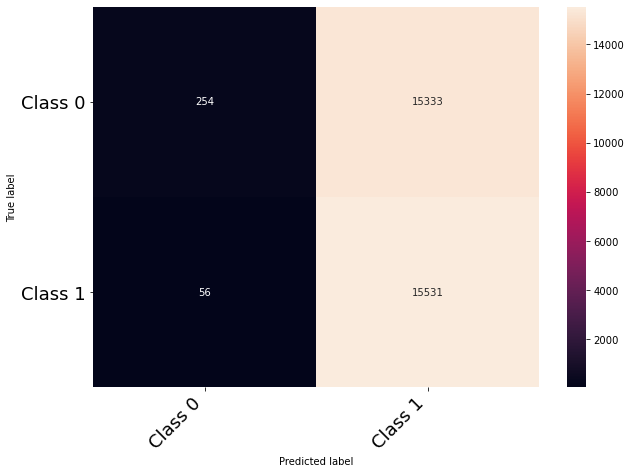

In [88]:


sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train), 2)
print("Train Accuracy score :",acc_sgd)
print("Test Accuracy score :",  round(sgd.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1']) # Amaç Class 1 i doğru tahmin etmek !

In [89]:
sgd_val = model_selection.cross_val_score(sgd, X_train, y_train, cv=kf).mean()

In [90]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'SGD'),
    ('Train Accuracy', round(acc_sgd*100, 2)),
    ('Test Accuracy', (sgd.score(X_test, y_test))*100),
    ("CV Accuracy",sgd_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('SGD')

Precision : 0.6612812296192244
Recall    : 0.5063514467184193
F-score   : 0.35033018571726865


### 2. Logistic Regression

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy score : 0.67
Test Accuracy score : 0.67


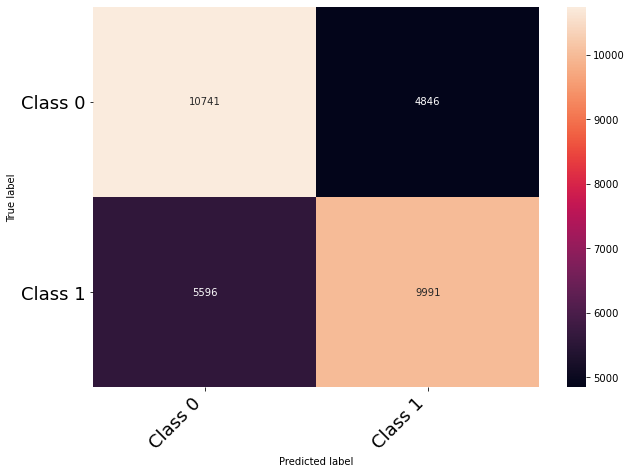

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train), 2)

print("Train Accuracy score :",acc_log)
print("Test Accuracy score :",  round(logreg.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [92]:
log_val = model_selection.cross_val_score(logreg, X_train, y_train, cv=kf).mean()

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [93]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(acc_log*100, 2)),
    ('Test Accuracy', round((logreg.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",log_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Logistic Regression')

Precision : 0.6654243790459993
Recall    : 0.6650413806377109
F-score   : 0.6648473903129715


### 4. Decision Tree

Train Accuracy score : 1.0
Test Accuracy score : 0.84


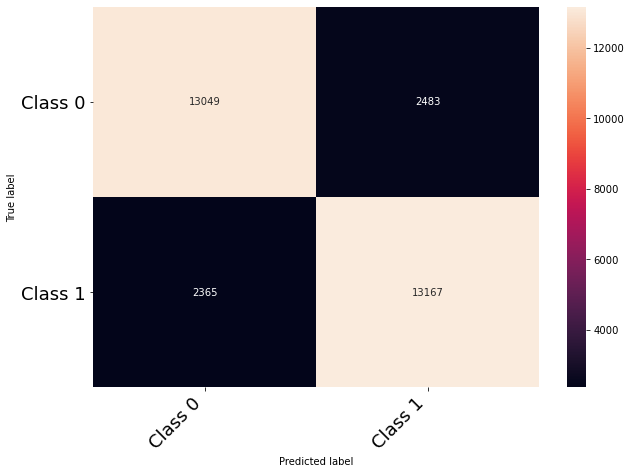

In [65]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) , 2)

print("Train Accuracy score :",acc_decision_tree)
print("Test Accuracy score :",  round(decision_tree.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1']) # 1 85

In [42]:
dt_val = model_selection.cross_val_score(decision_tree, X_train, y_train, cv=5).mean()

In [43]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Decision Tree'),
    ('Train Accuracy', round(acc_decision_tree*100, 2)),
    ('Test Accuracy', round((decision_tree.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",dt_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Decision Tree')

Precision : 0.769105016446573
Recall    : 0.7688475836431227
F-score   : 0.7687922888273175


### 5. Random Forest

Train Accuracy score : 0.9982998652723424
Test Accuracy score : 0.8919933277731443


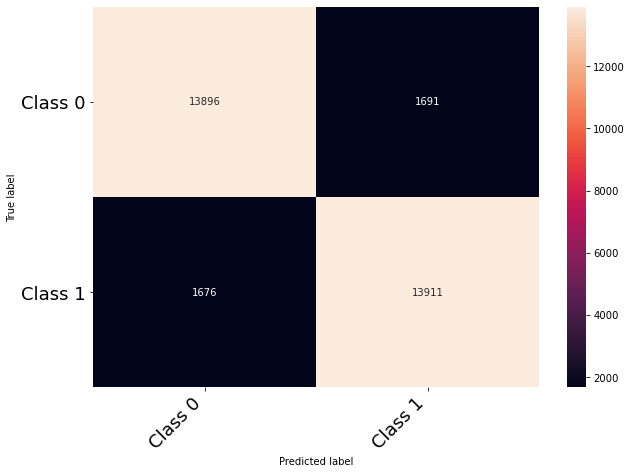

In [94]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  random_forest.score(X_test, y_test))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)   
                                                          
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])  # 99 89 89

In [95]:
results = model_selection.cross_val_score(random_forest, X_train, y_train, cv=kf).mean()
print(results.mean())  

0.8902510105194447


In [96]:
col_imp = random_forest.feature_importances_

importances = pd.DataFrame({'feature':(df.drop(columns=["is_canceled"])).columns,'importance':np.round(col_imp,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(60) 

,importance
feature,
lead_time,0.128
country,0.105
adr,0.080
total_of_special_requests,0.073
agent,0.068
arrival_date_day_of_month,0.056
arrival_date_week_number,0.048
required_car_parking_spaces,0.042
stays_in_week_nights,0.036


In [97]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'Random Forest'),
    ('Train Accuracy', round(acc_random_forest*100, 2)),
    ('Test Accuracy', round((random_forest.score(X_test, y_test))*100, 2)),
    ("CV Accuracy",results*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Random Forest')

Precision : 0.8919936907981361
Recall    : 0.8919933277731443
F-score   : 0.8919933027669189


## 6. KNN

Train Accuracy Score of Basic KNN model: % 1.0
Test Accuracy Score of Basic KNN model: % 0.83


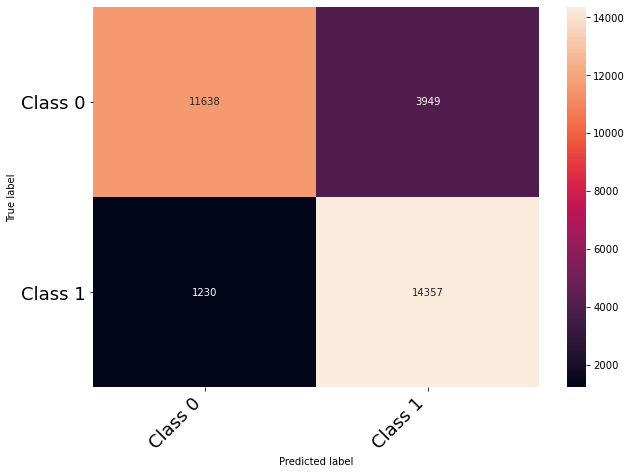

In [110]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = round(knn.score(X_train, y_train), 2)
knn_acc_test = round(accuracy_score(y_test, y_pred),2)
print(f'Train Accuracy Score of Basic KNN model: % {knn_acc}')
print(f'Test Accuracy Score of Basic KNN model: % {knn_acc_test}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [102]:
knn_val = model_selection.cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy').mean()

In [103]:
# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

perform_list.append(dict([
    ('Model', 'KNN'),
    ('Train Accuracy', round(knn_acc*100, 2)),
    ('Test Accuracy', round(knn_acc_test*100, 2)),
    ("CV Accuracy",knn_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('KNN')

Precision : 0.8443462145155674
Recall    : 0.8338679668954898
F-score   : 0.8325944544497985


#### 8. Bagging Classifier

Train Accuracy Score of Bagged Decision Trees: % 99.83
Test Accuracy Score of Bagged Decision Trees: % 88.44
Precision : 0.8844432528383815
Recall    : 0.8843908385192789
F1-score   : 0.8843868978973657


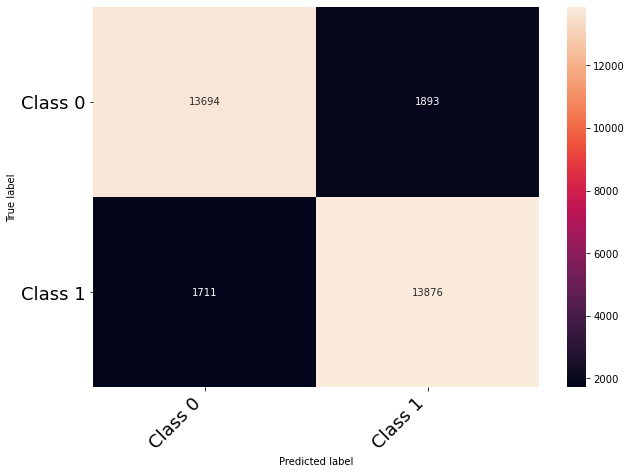

In [104]:
num_estimator = 100
seed = 7
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_estimator,
    bootstrap=True, n_jobs=-1, random_state=seed)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

bag_acc = round(bag.score(X_train, y_train) * 100, 2)
bag_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Bagged Decision Trees: % {bag_acc}')
print(f'Test Accuracy Score of Bagged Decision Trees: % {bag_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [112]:
bag_val = model_selection.cross_val_score(bag, X_train, y_train, cv=3).mean()

In [113]:

perform_list.append(dict([
    ('Model', 'Bagging Classifier'),
    ('Train Accuracy', round(bag_acc, 2)),
    ('Test Accuracy', round(bag_acc_test, 2)),
    ("CV Accuracy",bag_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Bagging Classifier')

### 9. ExtraTree

Train Accuracy Score of Extra Trees: % 99.83
Test Accuracy Score of Extra Trees: % 88.59
Precision : 0.8860379948995947
Recall    : 0.8859305831782895
F1-score   : 0.8859226479200308


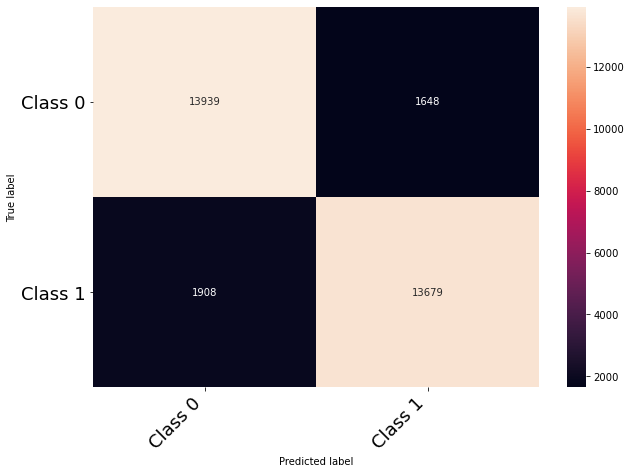

In [114]:
etc = ExtraTreesClassifier(n_estimators=num_estimator)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

etc_acc = round(etc.score(X_train, y_train) * 100, 2)
etc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Extra Trees: % {etc_acc}')
print(f'Test Accuracy Score of Extra Trees: % {etc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [116]:
etc_val = model_selection.cross_val_score(etc, X_train, y_train, cv=5).mean()

In [117]:
perform_list.append(dict([
    ('Model', 'Extra Tree'),
    ('Train Accuracy', round(etc_acc, 2)),
    ('Test Accuracy', round(etc_acc_test, 2)),
    ("CV Accuracy",etc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Extra Tree Classifier')

### 10. AdaBoost

Train Accuracy Score of AdaBoostClassifier: % 99.83
Test Accuracy Score of AdaBoostClassifier: % 87.72
Precision : 0.8772860898125066
Recall    : 0.8772053634438957
F1-score   : 0.8771987946254056


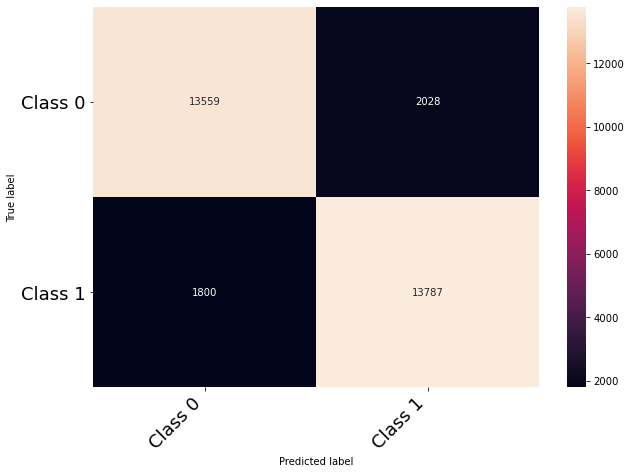

In [118]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_estimator, random_state = seed)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

abc_acc = round(abc.score(X_train, y_train) *100 , 2)
abc_acc_test = round(accuracy_score(y_test, y_pred) * 100 ,2)

print(f'Train Accuracy Score of AdaBoostClassifier: % {abc_acc}')
print(f'Test Accuracy Score of AdaBoostClassifier: % {abc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [121]:
abc_val = model_selection.cross_val_score(abc, X_train, y_train, cv=5).mean()

In [122]:
perform_list.append(dict([
    ('Model', 'AdaBoost'),
    ('Train Accuracy', round(abc_acc, 2)),
    ('Test Accuracy', round(abc_acc_test, 2)),
    ("CV Accuracy",abc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('AdaBoost')

#### 11. Gradient Boosting

Train Accuracy Score of GradientBoostingClassifier: % 75.85
Test Accuracy Score of GradientBoostingClassifier: % 75.72
Precision : 0.772833842357732
Recall    : 0.7572015140822481
F1-score   : 0.7536731187059741


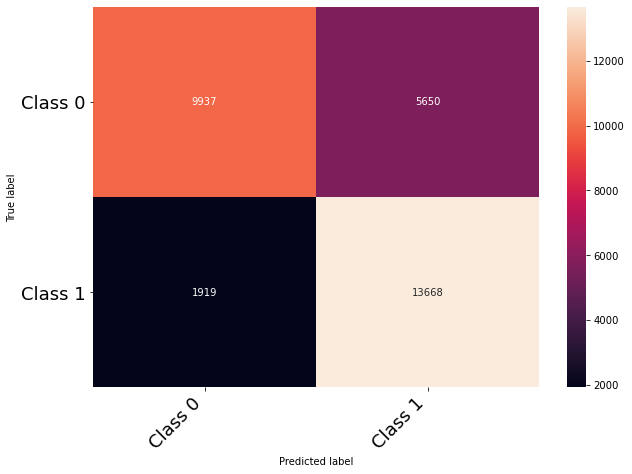

In [123]:
gbc = GradientBoostingClassifier(n_estimators=num_estimator, learning_rate=0.01, random_state=seed)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_acc = round(gbc.score(X_train, y_train) * 100, 2)
gbc_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GradientBoostingClassifier: % {gbc_acc}')
print(f'Test Accuracy Score of GradientBoostingClassifier: % {gbc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [125]:
gbc_val = model_selection.cross_val_score(gbc, X_train, y_train, cv=5).mean() 

In [126]:
perform_list.append(dict([
    ('Model', 'Gradient Boosting'),
    ('Train Accuracy', round(gbc_acc, 2)),
    ('Test Accuracy', round(gbc_acc_test, 2)),
    ("CV Accuracy",gbc_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Gradient Boosting')

### Naive Bayes
#### 1.Gaussian

Train Accuracy Score of GaussianNB: % 67.65
Test Accuracy Score of GaussianNB: % 67.49
Precision : 0.7307710630334241
Recall    : 0.674921408866363
F1-score   : 0.6539864427862534


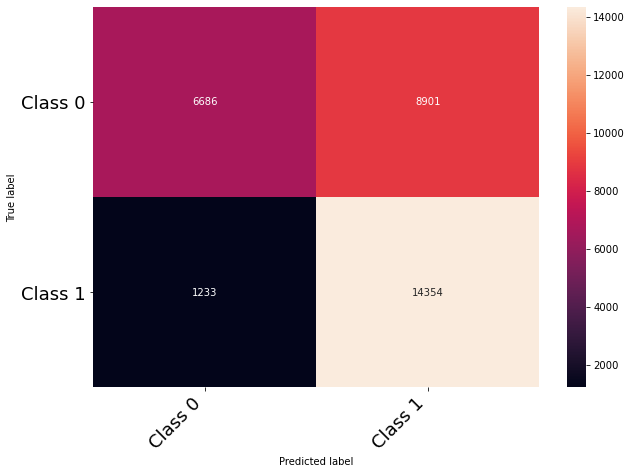

In [127]:
nb_g=GaussianNB()
nb_g.fit(X_train, y_train)
y_pred = nb_g.predict(X_test)

nbg_acc=round(nb_g.score(X_train, y_train) * 100, 2)
nbg_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [128]:
nb_g_val = model_selection.cross_val_score(nb_g, X_train, y_train, cv=kf).mean()

In [129]:
perform_list.append(dict([
    ('Model', 'GaussianNB'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ("CV Accuracy",nb_g_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('GaussianNB')

#### 2. Bernoulli

Train Accuracy Score of BernoulliNB: % 72.7
Test Accuracy Score of BernoulliNB: % 72.73
Precision : 0.7389643640476136
Recall    : 0.7273048052864567
F1-score   : 0.7239373908330837


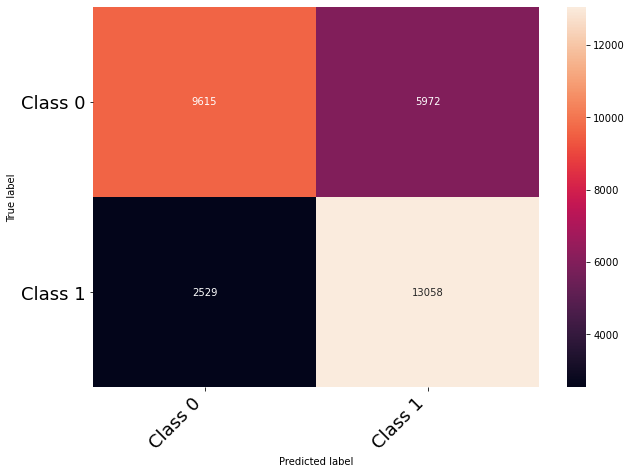

In [130]:

nb_b=BernoulliNB()
nb_b.fit(X_train, y_train)
y_pred = nb_b.predict(X_test)

nbb_acc=round(nb_b.score(X_train, y_train) * 100, 2)
nbb_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of BernoulliNB: % {nbb_acc}')
print(f'Test Accuracy Score of BernoulliNB: % {nbb_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [131]:
nb_b_val = model_selection.cross_val_score(nb_b, X_train, y_train, cv=kf,).mean()

In [132]:
perform_list.append(dict([
    ('Model', 'BernoulliNB'),
    ('Train Accuracy', round(nbb_acc, 2)),
    ('Test Accuracy', round(nbb_acc_test, 2)),
    ("CV Accuracy",nb_b_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('BernoulliNB')

### Voting Classifier

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy Score of BernoulliNB: % 72.46
Test Accuracy Score of BernoulliNB: % 69.46
Precision : 0.6950831671907995
Recall    : 0.6946493873099377
F1-score   : 0.6944795512526207


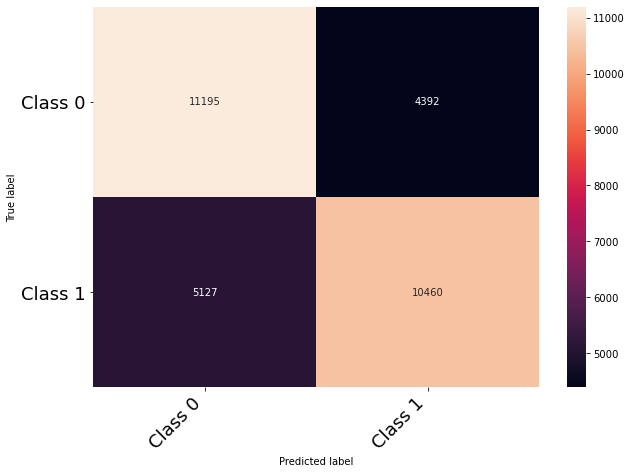

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

ensemble_acc=round(ensemble.score(X_train, y_train) * 100, 2)
ensemble_acc_test=round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of BernoulliNB: % {ensemble_acc}')
print(f'Test Accuracy Score of BernoulliNB: % {ensemble_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [134]:
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=3,scoring="accuracy")
print(results.mean())

C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\istay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
perform_list.append(dict([
    ('Model', 'Voting'),
    ('Train Accuracy', round(ensemble_acc, 2)),
    ('Test Accuracy', round(ensemble_test, 2)),
    ("CV Accuracy",ensemble_val*100),
    ('Precision', round(precision*100, 2)),
    ('Recall', round(recall*100, 2)),
    ('F1', round(fscore*100, 2))
     ]))

# add model to list
models.append('Voting Classifier')

In [135]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Train Accuracy', 'Test Accuracy','CV Accuracy', 'Precision', 'Recall', 'F1']]
model_performance = model_performance.sort_values(by="CV Accuracy",ascending=False)
model_performance

,Model,Train Accuracy,Test Accuracy,CV Accuracy,Precision,Recall,F1
2,Random Forest,99.83,89.200000,89.025101,89.20,89.20,89.20
4,Bagging Classifier,99.83,88.440000,88.413462,88.44,88.44,83.26
6,Extra Tree,99.83,88.590000,88.032766,88.60,88.59,83.26
5,Bagging Classifier,99.83,88.440000,87.505614,88.52,88.51,83.26
7,AdaBoost,99.83,87.720000,86.363616,87.73,87.72,83.26
3,KNN,100.00,83.000000,83.309801,84.43,83.39,83.26
8,Gradient Boosting,75.85,75.720000,75.524474,77.28,75.72,83.26
10,BernoulliNB,72.70,72.730000,72.693103,73.90,72.73,83.26
1,Logistic Regression,67.00,66.500000,68.105089,66.54,66.50,66.48
9,GaussianNB,67.65,67.490000,67.632284,73.08,67.49,83.26


In [ ]:
# Logistic Regression looks fine ! The other looks overfit.

In [64]:
Counter(y_test)

Counter({0: 13830, 1: 13829})

In [ ]:

# xgboost extratree randomforest baggingclas

In [136]:
# Proba Calculate
knn_proba = knn.predict_proba(X_test)
lr_proba = logreg.predict_proba(X_test)
nb_proba = nb_g.predict_proba(X_test)
dt_proba = decision_tree.predict_proba(X_test)
rf_proba = random_forest.predict_proba(X_test) # Random Forest
etc_proba = etc.predict_proba(X_test) # EkstraTree
abc_proba = abc.predict_proba(X_test) # AdaBoost
bag_proba = bag.predict_proba(X_test) # Bagging

ValueError: Number of features of the model must match the input. Model n_features is 68 and input n_features is 56 

In [ ]:
def plot_roc_curves():
    plt.figure(figsize=(10,6))
    lw = 2
    
    # KNN
    fpr, tpr, thresholds = roc_curve(y_test, knn_proba[:,1], pos_label=1)
    auc_knn = roc_auc_score(y_test, knn_proba[:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='KNN, auc=%.3f' % auc_knn)
    
    
    # Logistic Regression
    fpr, tpr, thresholds = roc_curve(y_test, lr_proba[:,1], pos_label=1)
    auc_lr = roc_auc_score(y_test, lr_proba[:,1])
    plt.plot(fpr, tpr, color='r',
             lw=lw, label='LR, auc=%.3f' % auc_lr)
         
    
    # Naive Bayes
    fpr, tpr, thresholds = roc_curve(y_test, nb_proba[:,1], pos_label=1)
    auc_nbc = roc_auc_score(y_test, nb_proba[:,1])
    plt.plot(fpr, tpr, color='chartreuse',
             lw=lw, label='Naive Bayes, auc=%.3f' % auc_nbc)
    
        
    # Decision Tree
    fpr, tpr, thresholds = roc_curve(y_test, dt_proba[:,1], pos_label=1)
    auc_dt = roc_auc_score(y_test, dt_proba[:,1])
    plt.plot(fpr, tpr, color='m',
             lw=lw, label='Decision Tree, auc=%.3f' % auc_dt)
   
    # Random Forest 
    fpr, tpr, thresholds = roc_curve(y_test, rf_proba[:,1], pos_label=1)
    auc_rf = roc_auc_score(y_test, rf_proba[:,1])
    plt.plot(fpr, tpr, color='g',
             lw=lw, label='Random Forest, auc=%.3f' % auc_rf)
     
    # Extra Trees
    fpr, tpr, thresholds = roc_curve(y_test, etc_proba[:,1], pos_label=1)
    auc_etc = roc_auc_score(y_test, etc_proba[:,1])
    plt.plot(fpr, tpr, color='b',
             lw=lw, label='Extra Trees, auc=%.3f' % auc_etc)

    # Ada Boost Classifier
    fpr, tpr, thresholds = roc_curve(y_test, abc_proba[:,1], pos_label=1)
    auc_abc = roc_auc_score(y_test, abc_proba[:,1])
    plt.plot(fpr, tpr, color='#00cc99',
             lw=lw, label='Ada Boost, auc=%.3f' % auc_abc)
  
   
    
    # Bagging Classifier
    fpr, tpr, thresholds = roc_curve(y_test, bag_proba[:,1], pos_label=1)
    auc_bag = roc_auc_score(y_test, bag_proba[:,1])
    plt.plot(fpr, tpr, color='#f4bbff',
             lw=lw, label='Bagging, auc=%.3f' % auc_bag)    
    
    # Formatting
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver Operating Characteristic', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig("roc.jpeg",dpi=300,bbox_inches="tight")

In [ ]:
plot_roc_curves()


### Optimizasyon

RandomForest modellinin hiperparametrelerini tune edelim.

#### UnderSampling İle Deneyelim. Daha başarılı olabilir miydi acaba?

In [61]:
Counter(y_test)

Counter({0.0: 7622, 1.0: 7621})

### RandomizedSearchCV ExtraTree

In [63]:
# Number of trees in the ensamble
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]
# MAX FEATURES to be utilized in every split
max_features = ['auto', 'sqrt']
# DEPTH of Tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]
max_depth.append(None)
# Minimum nymber of samples to use to form a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



ex = RandomForestClassifier()

ex_random = RandomizedSearchCV(estimator = ex, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
ex_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 129.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [64]:
ex_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 506}

Train Accuracy score : 0.97
Test Accuracy score : 0.89


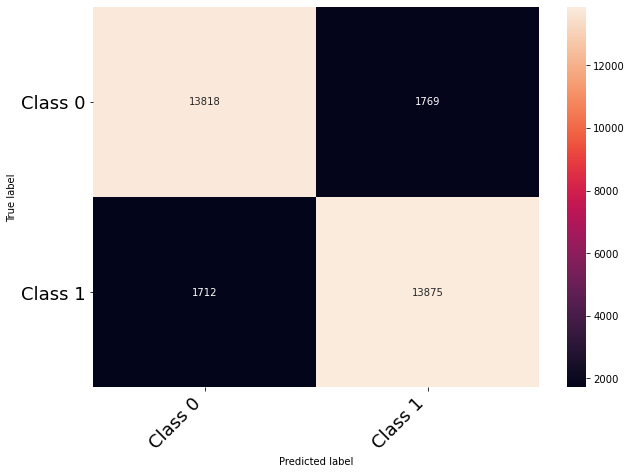

In [137]:
random_forest = RandomForestClassifier(bootstrap=False,
 max_depth= None,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 506)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train), 2)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  round(random_forest.score(X_test, y_test), 2))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)   
                                                          
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [64]:
acc_random_forest = random_forest.score(X_train, y_train)

print("Train Accuracy score :",acc_random_forest)
print("Test Accuracy score :",  random_forest.score(X_test, y_test))


Train Accuracy score : 0.9739561536232817
Test Accuracy score : 0.9012651707819592


Sınıflandırma problemlerinde overfitting belasıyla uğraşıyorsanız bagging kullanmalısınız.Bagging'in amacı varyansı düşürmektir. Bagging yapmanın bir numaralı kuralı da VotingClassifier yapmaktır.
Yöntemler:
- Max Voting      (En yüksek puanı baz al.)
- Avearage Voting (Modeller hangisini seçmiş?)
- Weighted Voting (Bir bilene soralım demek :)


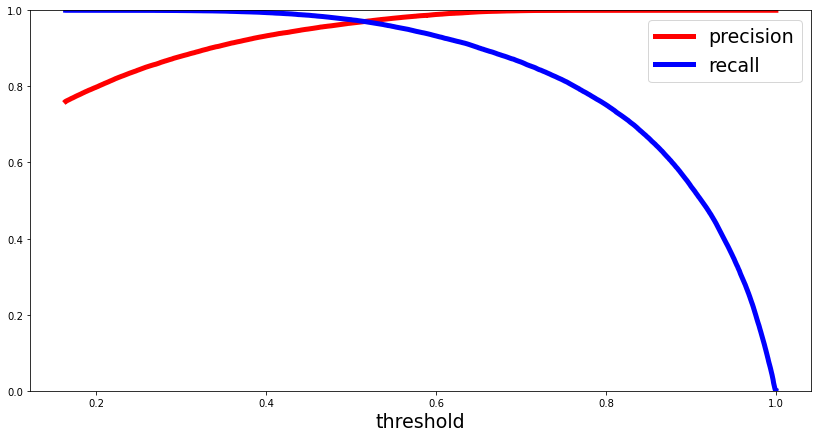

In [138]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [139]:
import pickle

with open("predictor/random_forest.pkl", "wb") as f:
    pickle.dump(random_forest, f) # flask ile kullanmak için pickle'a kaydettim.